In [18]:
# import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# Import the API key.
from config import weather_api_key

import time
from datetime import datetime 
from citipy import citipy

# Import the requests library.
import requests

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [2]:
# store the lat and long
# delcare each array as var 
# 6.1.4

# generate random lat 
lats = np.random.uniform(low=-90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)

# create zip object in memory (packing the two together)
lat_lngs = zip(lats, lngs)
# packed into tuple (1500 of them) and access as 0,1 index form
lat_lngs


In [3]:
# unpack the lat_lngs zip object into list type
# cannot simply print out coordinates on its own without using 0,1 indexing
coordinates = list(lat_lngs)

In [5]:
for coordinate in coordinates:
    (coordinate[0], coordinate[1])

In [6]:
# 6.1.5 generate random wolrd cities 
# Use the citipy module to determine city based on latitude and longitude.
# iterate through the coordinates unzipped tuple 
# use citypy and add lat, long
# print the city name, chain the name to the nearest city function
# print the country name, chain the country code to nearest city function 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
#print(cities)
len(cities)

627

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd1fbd1a397ad51b5a5aa7507997d4cf


In [8]:
# 1. import dependencies, initialize counters and a list to hold weather data
city_data = []
print("Beginning Data Retrieval           ")
print("-----------------------------------")

# create counters
# initialize to 1 b/c we want first iteration of logging for each response 
record_count = 1
set_count = 1

# fixed version that adds not city index, but name 
# enumerate helps refrence the index and city in list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    # remove blank spaces in city name with .replace
    city_url = url + "&q=" + city.replace(" ","+")

    # create print statement to tell us record and set counts 
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval           
-----------------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | coihaique
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | bo phloi
Processing Record 11 of Set 1 | davila
Processing Record 12 of Set 1 | ust-kut
Processing Record 13 of Set 1 | soyo
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | comodoro rivadavia
Processing Record 21 of Set 1 | namatanai
Processing Record 22 of 

KeyboardInterrupt: 

In [9]:
# 6.2.7 create the df for city weather data
# now we have a list of dict, use pandas to make our df
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
print(city_data_df)
#city_data_df.head(10)

              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0           Atuona  -9.8000 -139.0333     78.49        68          60   
1        Coihaique -45.5752  -72.0662     54.21        58          20   
2        Kavaratti  10.5669   72.6420     85.05        68         100   
3         Hermanus -34.4187   19.2345     62.80        84          97   
4   Guerrero Negro  27.9769 -114.0611     68.14        54           0   
..             ...      ...       ...       ...       ...         ...   
86        Cidreira -30.1811  -50.2056     62.64        96         100   
87             Hun  29.1268   15.9477     70.07        46          55   
88        Zhigansk  66.7697  123.3711     23.34        96         100   
89      Rio Grande -32.0350  -52.0986     61.95        90         100   
90      Nanortalik  60.1432  -45.2371     36.55        86          51   

    Wind Speed Country                 Date  
0        20.07      PF  2022-05-10 20:52:23  
1         3.44      CL  2022-05

In [10]:
# 6.3.1 plot lat vs temp
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

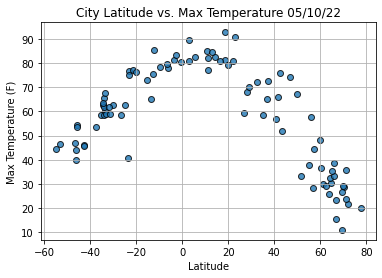

In [13]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

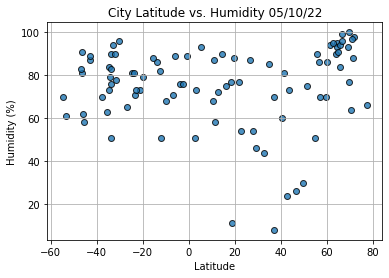

In [15]:
# 6.3.2 plot lat vs humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

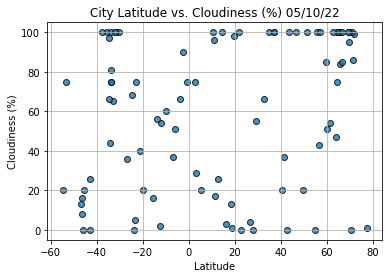

In [16]:
# 6.3.3 Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

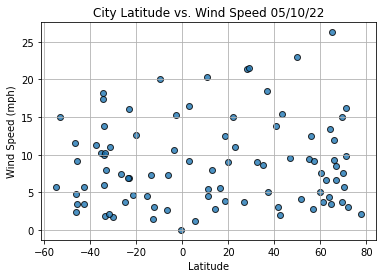

In [17]:
# 6.3.4 Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# 6.4.2 correlation between lat and max temp
# indep = lat 
# dep = temp
# p > 0.05 not sig, < 0.05 is sig 

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, 
                           title, y_label, text_coordinates):
# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [28]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

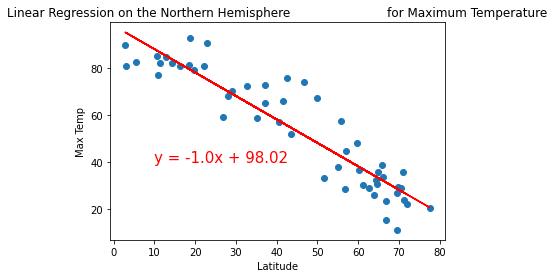

In [29]:
# lin reg on max temp for northern hemi 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

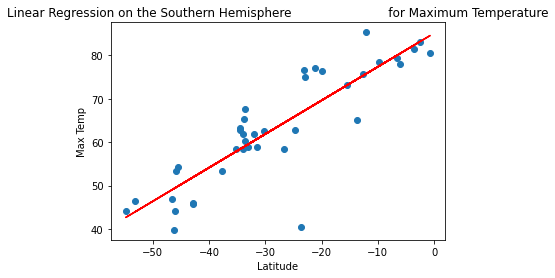

In [30]:
# lin reg for max temp for southern 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

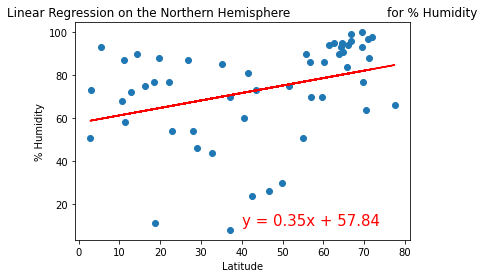

In [31]:
# 6.4.3 find correlation between lat and percent humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

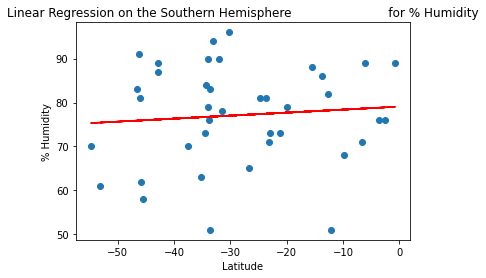

In [32]:
# lin reg on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

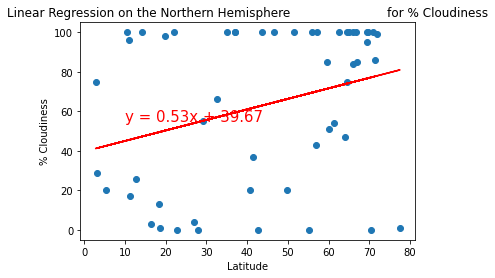

In [35]:
# 6.4.4 find correlation between lat and % cloudiness 
# lin reg on % cloud for north hemi 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

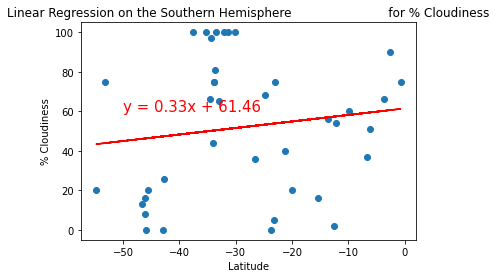

In [36]:
# lin reg on southern hemi for percent cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

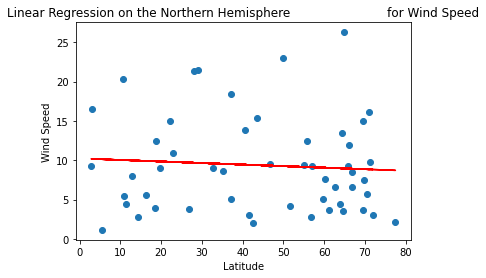

In [37]:
# 6.4.5 correlation between lat and wind speed 
# lin reg on north hemi for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

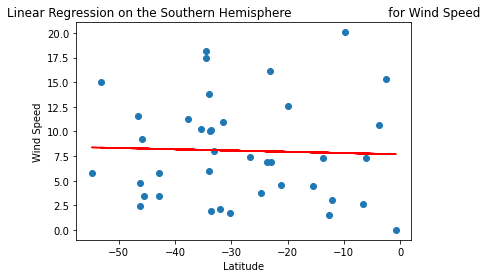

In [38]:
# lin reg on south hemi for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))